In [51]:
import numpy as np
import pandas as pd

from argparse import ArgumentParser
import os.path
from pathlib import Path

import feather

import matplotlib.pyplot as plt
import matplotlib as mpl


from sklearn.metrics import mean_squared_error, mean_absolute_error


In [69]:
print(f"Loading data...")
# Load in the time_series from the previous stage in the pipeline
time_series = feather.read_dataframe("../data_files/B/once/35days/1hour/interp_diff_percent_from_code_hour_day_-_full_segment_time_series.feather")
time_series = time_series.set_index(time_series.columns[0])

print("\tLoaded")

Loading data...
	Loaded


In [70]:
time_series = time_series.replace(np.nan, 0)

time_series_shifted = time_series.shift(1)

time_series_shifted = time_series_shifted.replace(np.nan, 0)






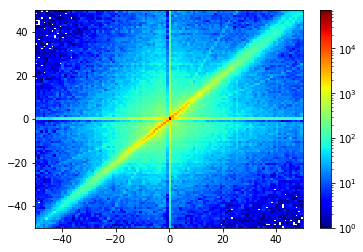

In [71]:
plt.hist2d(time_series.values.ravel(), time_series_shifted.values.ravel(), norm=mpl.colors.LogNorm(), bins=(100, 100), range=[[-50, 50], [-50, 50]], cmap=plt.cm.jet)
plt.colorbar()



In [72]:
mean_absolute_error(time_series_shifted.values.ravel(), time_series.values.ravel())

18.72035910615835

In [74]:
mean_absolute_error([0] * 799140, time_series.values.ravel())

20.761728709109978

In [56]:
stop_events = feather.read_dataframe("../data_files/B/once/35days/stop_events_with_geo_train_test_averages.feather")
stop_events = stop_events.set_index(stop_events.columns[0])

In [58]:
stop_events = stop_events.dropna(subset=['median_full_durations_by_segment_code_and_hour_and_day', 'full_duration'])

In [59]:
mean_absolute_error(stop_events['median_full_durations_by_segment_code_and_hour_and_day'], stop_events['full_duration'])


21.470297393171787

In [ ]:
mean_absolute_error()